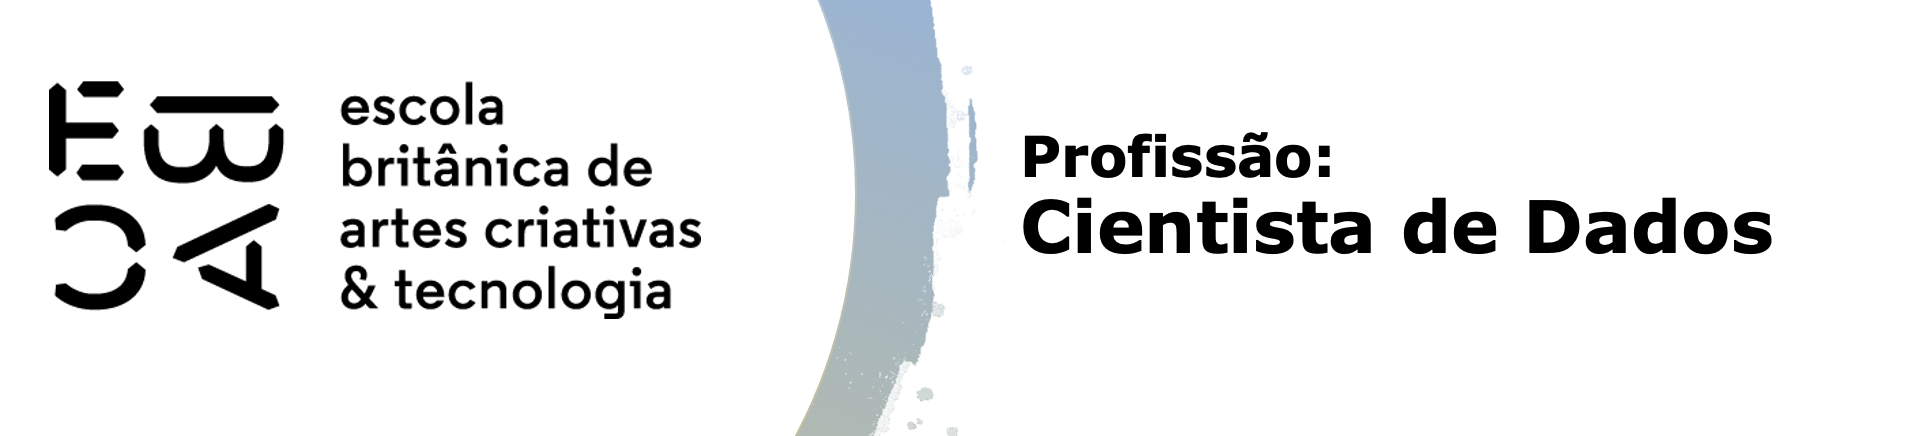

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [4]:
# Importando a biblioteca necessária
import pandas as pd

In [5]:
# Carregando os conjuntos de treinamento
X_train = pd.read_csv('./output/X_train_processed.csv', index_col=0) # Considerando que a primeira coluna é o índice
y_train = pd.read_csv('./input/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['activity'])

# Carregando os conjuntos de teste
X_test = pd.read_csv('./output/X_test_processed.csv', index_col=0)  # Considerando que a primeira coluna é o índice
y_test = pd.read_csv('./input/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['activity'])

# Verificando as primeiras linhas para garantir que tudo foi carregado corretamente
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
0        1           0.288585          -0.020294          -0.132905
1        1           0.278419          -0.016411          -0.123520
2        1           0.279653          -0.019467          -0.113462
3        1           0.279174          -0.026201          -0.123283
4        1           0.276629          -0.016570          -0.115362
   activity
0         5
1         5
2         5
3         5
4         5
   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
0        2           0.257178          -0.023285          -0.014654
1        2           0.286027          -0.013163          -0.119083
2        2           0.275485          -0.026050          -0.118152
3        2           0.270298          -0.032614          -0.117520
4        2           0.274833          -0.027848          -0.129527
   activity
0         5
1         5
2         5
3         5
4         5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Selecionando apenas as três melhores variáveis
X_train_selected = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
X_test_selected = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

# Construindo a árvore de decisão
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf.fit(X_train_selected, y_train)

# Calculando os ccp_alphas
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)


[0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 5.84401136e-05 6.17808017e-05 6.59866112e-05 6.73768888e-05
 7.02851049e-05 7.74168145e-05 7.99585551e-05 8.01474017e-05
 8.28222484e-05 8.29342439e-05 8.49667199e-05 9.21474511e-05
 9.63598696e-05 1.02953015e-04 1.04280015e-04 1.05722623e-04
 1.06211126e-04 1.10109332e-04 1.20580361e-04 1.24186720e-04
 1.32053657e-04 1.35233977e-04 1.36017410e-04 1.41963138e-04
 1.46351627e-04 1.47352194e-04 1.49244166e-04 1.49492770e-04
 1.50482754e-04 1.51968146e-04 1.55713461e-04 1.60511546e-04
 1.60628990e-04 1.64239147e-04 1.67323005e-04 1.74342668e-04
 1.74907961e-04 1.75578030e-04 1.78985873e-04 1.81439304e-04
 1.85996704e-04 1.87333070e-04 1.89065980e-04 1.89796602e-04
 1.96759215e-04 2.01481091e-04 2.01919050e-04 2.02866775e-04
 2.03119333e-04 2.03378413e-04 2.03817707e-04 2.04208078e-04
 2.05459167e-04 2.05888258e-04 2.06087949e-04 2.07617553e-04
 2.08114530e-04 2.108269

In [10]:
# Calculando os ccp_alpha

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Carregando um exemplo de dataset (substitua pelo seu dataset)
X, y = load_iris(return_X_y=True)

# Criando o classificador de árvore de decisão
clf = DecisionTreeClassifier(max_features=3, min_samples_leaf=20)
clf.fit(X, y)

# Calculando os ccp_alpha
path = clf.cost_complexity_pruning_path(X, y)
ccp_alpha = path.ccp_alphas

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
import time

# Definindo a árvore de decisão com a limitação das 3 melhores variáveis
clf = DecisionTreeClassifier(max_features=3, min_samples_leaf=20)

# Parâmetros para o Grid Search
param_grid = {
    'ccp_alpha': ccp_alpha[::10]
}

# Definindo a estratégia de validação cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Definindo o Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Medindo o tempo
start_time = time.time()

# Fit do Grid Search
grid_search.fit(X_train, y_train)

end_time = time.time()
print(f"Tempo total: {end_time - start_time:.2f} segundos")

# Melhores parâmetros encontrados
print("Melhor ccp_alpha:", grid_search.best_params_['ccp_alpha'])
print("Melhor score:", grid_search.best_score_)

Tempo total: 5.06 segundos
Melhor ccp_alpha: 0.0
Melhor score: 0.45497726264418814


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia na base de testes: 0.4133


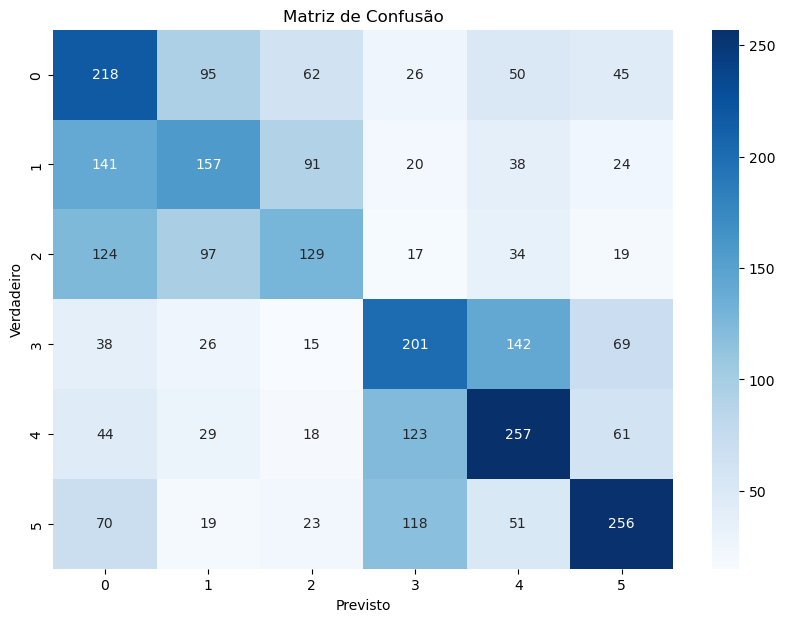

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Treinar a árvore com a melhor configuração em toda a base de treino
best_tree = DecisionTreeClassifier(ccp_alpha=0.0, max_features=3, min_samples_leaf=20)
best_tree.fit(X_train, y_train)

# 2. Calcular a acurácia na base de testes
y_pred = best_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia na base de testes: {acc:.4f}")

# 3. Visualizar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [29]:
# Criando uma nova variável binária que seja 1 se a classe for 1 e 0 caso contrário

y_binaria = np.where(y_train == 1, 1, 0)

In [20]:
# Usando as especificações para treinar a árvore

clf_binaria = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clf_binaria.fit(X_train, y_binaria)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [25]:
# Verificando a importância das variáveis e selecionando as 3 mais importantes

importances = clf_binaria.feature_importances_
indices = np.argsort(importances)[-3:]  # Pegando os índices das 3 variáveis mais importantes

In [30]:
# Selecionando as colunas mais importantes de acordo com o índice

selected_columns = X_train.columns[indices]

X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

In [31]:
# Treinando o modelo usando somente as três variáveis

clf_selected = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clf_selected.fit(X_train_selected, y_train)

y_pred = clf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia com as 3 variáveis mais importantes: {accuracy:.4f}")

Acurácia com as 3 variáveis mais importantes: 0.3699
